## Import Libraries

In [89]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
import dtale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

## Load the Data

In [2]:
df = pd.read_csv('final_data.csv')

In [3]:

dtale.show(df, open_browser=True)

In [4]:
df.shape

(10754, 22)

In [5]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [6]:
# uniqeness
df.duplicated().sum()

0

In [7]:
# Completeness
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [8]:
# Accurecy types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [9]:
# drop column player we dont need it 
# drop column position becuse we have position_encoded
df.drop('player',axis=1,inplace = True) 
df.drop('position',axis=1,inplace = True)
df.drop('name',axis=1,inplace= True) 
df.dtypes

team                    object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [10]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
# position is alrady encoded

categorical_features = ['team']
numeric_features = ['height', 'age', 'appearance','goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger']

       

In [11]:
for i in categorical_features:
    print (df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64


In [12]:
for i in numeric_features:
    print(df[i].value_counts())


height
180.000000    744
185.000000    608
175.000000    596
178.000000    594
183.000000    572
188.000000    493
184.000000    458
182.000000    449
181.240353    440
186.000000    423
187.000000    419
176.000000    390
177.000000    372
190.000000    371
173.000000    366
179.000000    359
181.000000    355
170.000000    312
191.000000    272
174.000000    270
189.000000    255
172.000000    254
192.000000    203
193.000000    181
171.000000    169
168.000000    124
194.000000    117
169.000000    107
195.000000     98
167.000000     85
196.000000     68
166.000000     44
165.000000     42
197.000000     31
198.000000     24
163.000000     16
160.000000     15
164.000000     14
199.000000     12
200.000000     12
202.000000      6
162.000000      6
161.000000      3
206.000000      2
204.000000      1
156.000000      1
159.000000      1
Name: count, dtype: int64
age
22.000000    841
23.000000    823
26.000000    812
25.000000    772
24.000000    767
21.000000    715
28.000000    67

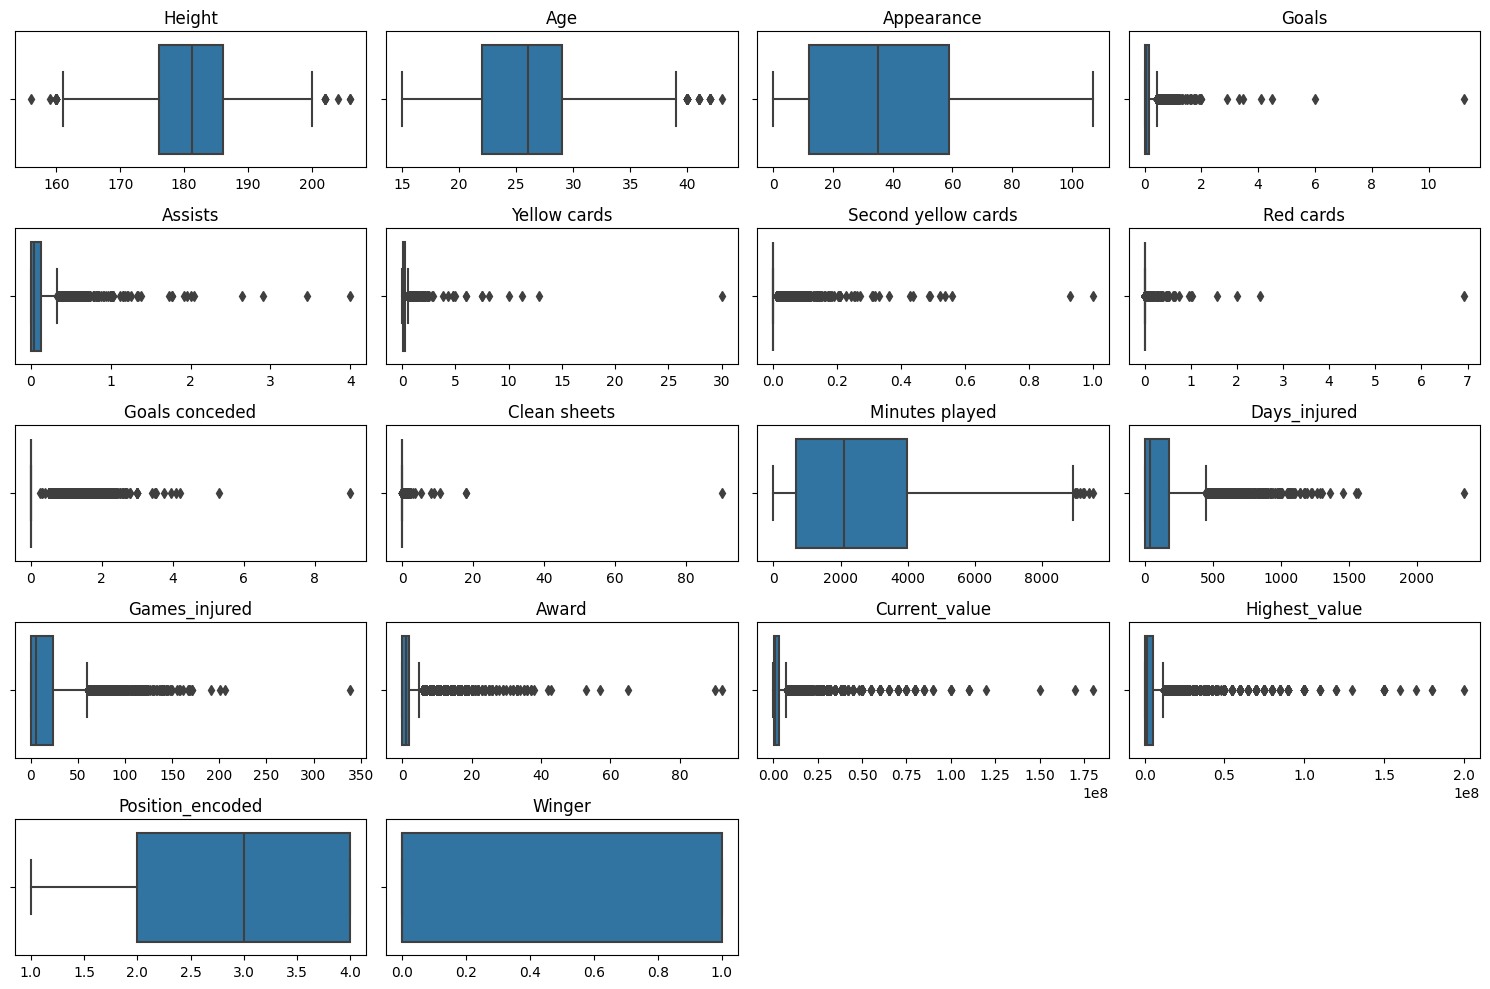

In [13]:
# boxplot for the feature 
num_features = len(numeric_features)

num_rows = math.ceil(num_features / 4)
num_cols = min(4, num_features)

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column])
    plt.title(column.capitalize())
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [ ]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)  # kde=True adds the Kernel Density Estimate line
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [14]:
df.shape

(10754, 19)

In [15]:
df = df[df['age']<40]
df = df[df["appearance"]<100]
df = df[df["goals"]>0.5]
df = df[df['award']<5]
df = df[df["days_injured"]<407]
df = df[df['games_injured']<60]
df = df[df["minutes played"]<8000]



In [16]:
df.shape

(364, 19)

In [16]:

fig = px.histogram(df, x='current_value', nbins=50, title='Histogram of Current Value')

fig.show()


#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [17]:
df.head(2)

,team,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
26,Manchester United,180.0,18.0,72,0.525730,0.300417,0.225313,0.025035,0.0,0.0,0.0,3595,50,11,2,25000000,25000000,4,1
161,Southampton FC,183.0,20.0,58,0.542714,0.226131,0.180905,0.000000,0.0,0.0,0.0,1990,0,0,0,12000000,12000000,4,0


In [18]:
categorical_features

['team']

In [19]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [20]:
df.shape

(364, 250)

In [21]:
print(df.columns.tolist()) 


['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'highest_value', 'position_encoded', 'winger', 'team_1.FC Köln', 'team_1.FC Union Berlin', 'team_1.FSV Mainz 05', 'team_AA Argentinos Juniors', 'team_AC Ajaccio', 'team_ACF Fiorentina', 'team_AJ Auxerre', 'team_AS Monaco', 'team_AZ Alkmaar', 'team_Adana Demirspor', 'team_Adelaide United', 'team_Ajax Amsterdam', 'team_Akhmat Grozny', 'team_Al-Adalah FC', 'team_Al-Fateh SC', 'team_Al-Hilal Saudi FC', 'team_Al-Ittihad Club (Jeddah)', 'team_Al-Nassr FC', 'team_Al-Raed SFC', 'team_Al-Shabab Club (Riyadh)', 'team_Al-Taawoun FC', 'team_Al-Tai', 'team_Al-Wehda FC', 'team_Alanyaspor', 'team_Albirex Niigata', 'team_Angers SCO', 'team_Antalyaspor', 'team_Arsenal FC', 'team_Atalanta BC', 'team_Atlanta United FC', 'team_Atlético de San Luis', 'team_Austin FC', 'team_Avispa Fukuoka', 'tea

In [22]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,team_Vitesse Arnhem,team_WSG Tirol,team_Watford FC,team_West Bromwich Albion,team_Western Sydney Wanderers,team_Western United FC,team_Wolfsberger AC,team_Yokohama F. Marinos,team_Zenit St. Petersburg,team_Ümraniyespor
26,180.0,18.0,72,0.525730,0.300417,0.225313,0.025035,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
161,183.0,20.0,58,0.542714,0.226131,0.180905,0.000000,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [23]:
# Calculate the 35th and 75th percentiles of the current_value
p35 = df['current_value'].quantile(0.35)
p75 = df['current_value'].quantile(0.75)

# Function to categorize current_values
def categorize_current_value(current_value):
    if current_value < p35:
        return 'cv_low'
    elif current_value < p75:
        return 'cv_good'
    else:
        return 'cv_high'

# Apply the function to create a new column
df['players_current_value_category'] = df['current_value'].apply(categorize_current_value)

df.drop('current_value', axis=1, inplace=True)

#Verify the distribution of the new categories
print(df['players_current_value_category'].value_counts())

players_current_value_category
cv_good    147
cv_low     123
cv_high     94
Name: count, dtype: int64


In [24]:
p35 ,p75

(400000.0, 3500000.0)

In [25]:
df['players_current_value_category'] 

26       cv_high
161      cv_high
184      cv_high
186      cv_high
242      cv_high
          ...   
10667     cv_low
10669     cv_low
10720     cv_low
10725     cv_low
10743     cv_low
Name: players_current_value_category, Length: 364, dtype: object

In [26]:
encoder = LabelEncoder()
#pcvc_encoded == players current value category encoded
df['pcvc_encoded'] = encoder.fit_transform(df['players_current_value_category'])  

#### 3. Feature selection

In [27]:
df.drop('players_current_value_category',axis=1,inplace=True)

In [28]:
corrl = df.corr()
#print(corrl['current_value'].sort_values(ascending=False))

print(corrl['pcvc_encoded'].sort_values(ascending=False))

pcvc_encoded                   1.000000
team_Jeonbuk Hyundai Motors    0.130844
goals                          0.130619
team_Cerezo Osaka              0.127226
team_Gangwon FC                0.113157
                                 ...   
minutes played                -0.202431
appearance                    -0.221586
age                           -0.315197
goals conceded                      NaN
clean sheets                        NaN
Name: pcvc_encoded, Length: 250, dtype: float64


In [29]:
# Set the correlation threshold
threshold = 0.1

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = corrl[abs(corrl['pcvc_encoded']) > threshold]['pcvc_encoded'].index
selected_features

Index(['age', 'appearance', 'goals', 'yellow cards', 'minutes played',
       'days_injured', 'games_injured', 'award', 'position_encoded',
       'team_Cerezo Osaka', 'team_Gangwon FC', 'team_Jeonbuk Hyundai Motors',
       'team_Kashiwa Reysol', 'team_Melbourne City FC', 'pcvc_encoded'],
      dtype='object')

In [30]:
selected_features = ['age', 'appearance', 'goals', 'yellow cards', 'minutes played',
       'days_injured', 'games_injured', 'award', 'position_encoded',
       'team_Cerezo Osaka', 'team_Gangwon FC', 'team_Jeonbuk Hyundai Motors',
       'team_Kashiwa Reysol', 'team_Melbourne City FC', 'pcvc_encoded']

In [31]:
df = df[selected_features]
df.head()

,age,appearance,goals,yellow cards,minutes played,days_injured,games_injured,award,position_encoded,team_Cerezo Osaka,team_Gangwon FC,team_Jeonbuk Hyundai Motors,team_Kashiwa Reysol,team_Melbourne City FC,pcvc_encoded
26,18.0,72,0.525730,0.225313,3595,50,11,2,4,False,False,False,False,False,1
161,20.0,58,0.542714,0.180905,1990,0,0,0,4,False,False,False,False,False,1
184,18.0,58,0.666477,0.051267,3511,0,0,0,4,False,False,False,False,False,1
186,26.0,71,0.716887,0.225307,4394,96,14,3,4,False,False,False,False,False,1
242,25.0,73,0.625280,0.121022,4462,261,26,3,4,False,False,False,False,False,1


#### 4. Prepare train and test data

In [32]:
# Prepare data
X = df.drop(['pcvc_encoded'], axis=1)
y = df['pcvc_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [33]:
X.shape

(364, 14)

## Buliding the Model

In [68]:
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(max_depth=3, n_estimators=60)

In [69]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7],   # Regularization strength
    'n_estimators':[60, 70, 75, 90]
}
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

In [70]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=60)

In [72]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=60),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [60, 70, 75, 90]},
             scoring='f1_macro', verbose=1)

In [73]:
grid_search.best_params_

{'max_depth': 2, 'n_estimators': 75}

In [74]:
best_model = grid_search.best_estimator_

## Test the Model

In [75]:
# Predict and evaluate the model
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf_g = best_model.predict(X_test)

## Evaluating the Model 

In [76]:
# our benchmark model
base_model = round(df['pcvc_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

25.82

1. Accuracy

In [77]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.4657534246575342

In [78]:
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.6027397260273972

In [79]:
y_pred_train_dt = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_dt)
accuracy

1.0

In [80]:
y_pred_train_rf = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf)
accuracy

0.6804123711340206

In [81]:
accuracy = accuracy_score(y_test, y_pred_rf_g)
accuracy

0.6027397260273972

In [82]:
y_pred_train_rf_g = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf_g)
accuracy

0.6735395189003437

In [83]:
conf_matrix = confusion_matrix(y_test, y_pred_rf_g)
conf_matrix

array([[20,  2,  7],
       [13,  7,  2],
       [ 5,  0, 17]], dtype=int64)

In [90]:
print(classification_report(y_test,
                      y_pred_rf_g,
                      labels=list(best_model.classes_)))

              precision    recall  f1-score   support

           0       0.53      0.69      0.60        29
           1       0.78      0.32      0.45        22
           2       0.65      0.77      0.71        22

    accuracy                           0.60        73
   macro avg       0.65      0.59      0.59        73
weighted avg       0.64      0.60      0.59        73



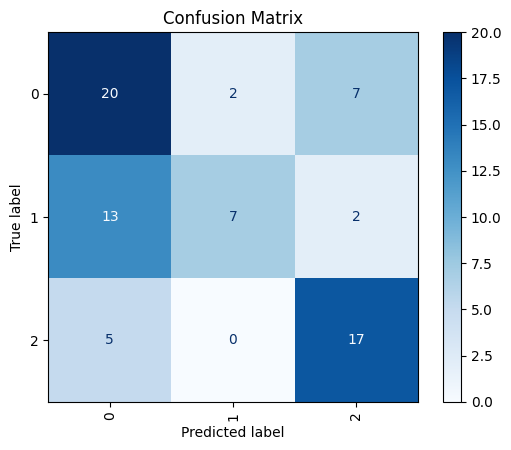

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_g,
                                        display_labels=best_model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [85]:
# Calculate Precision
precision = precision_score(y_test, y_pred_rf_g, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.65


In [86]:
# Calculate Recall
recall = recall_score(y_test, y_pred_rf_g, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.59


In [87]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf_g, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.59


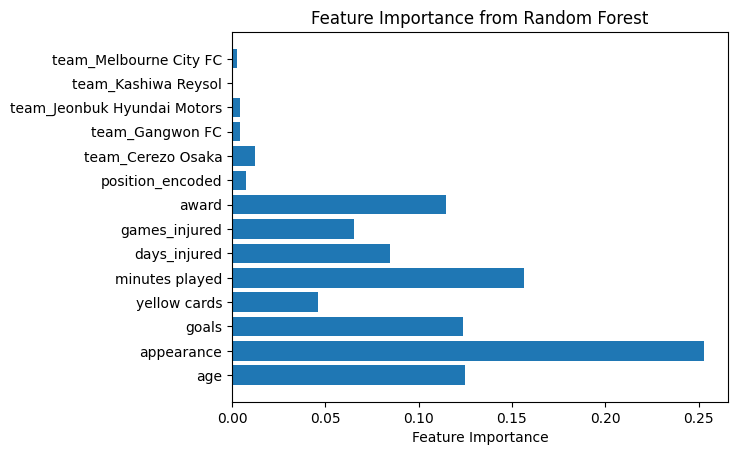

In [88]:
# Feature importance from Random Forest
feature_importances = best_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()